3.9260404109954834


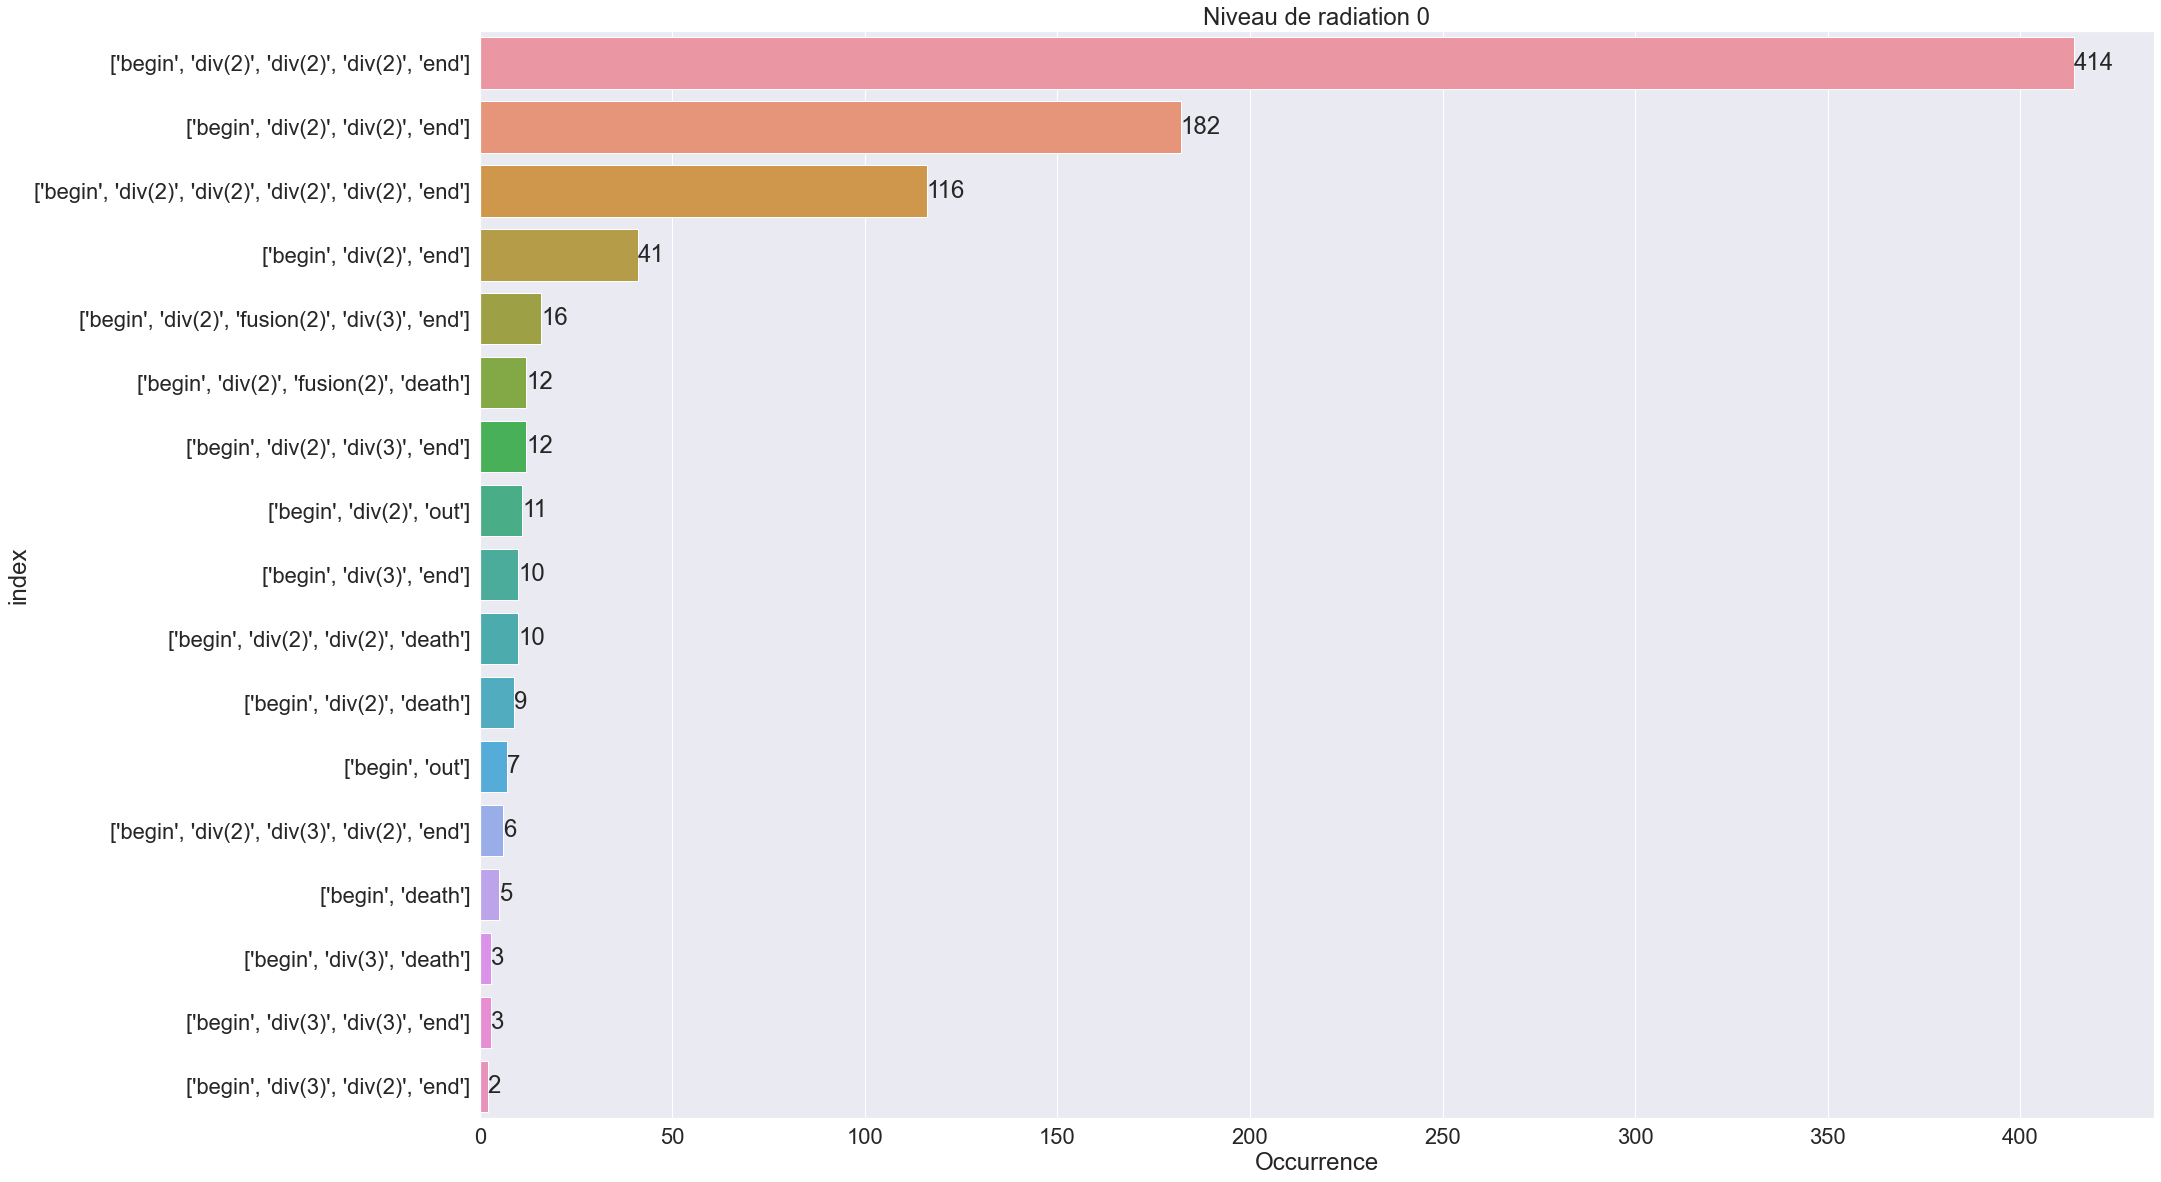

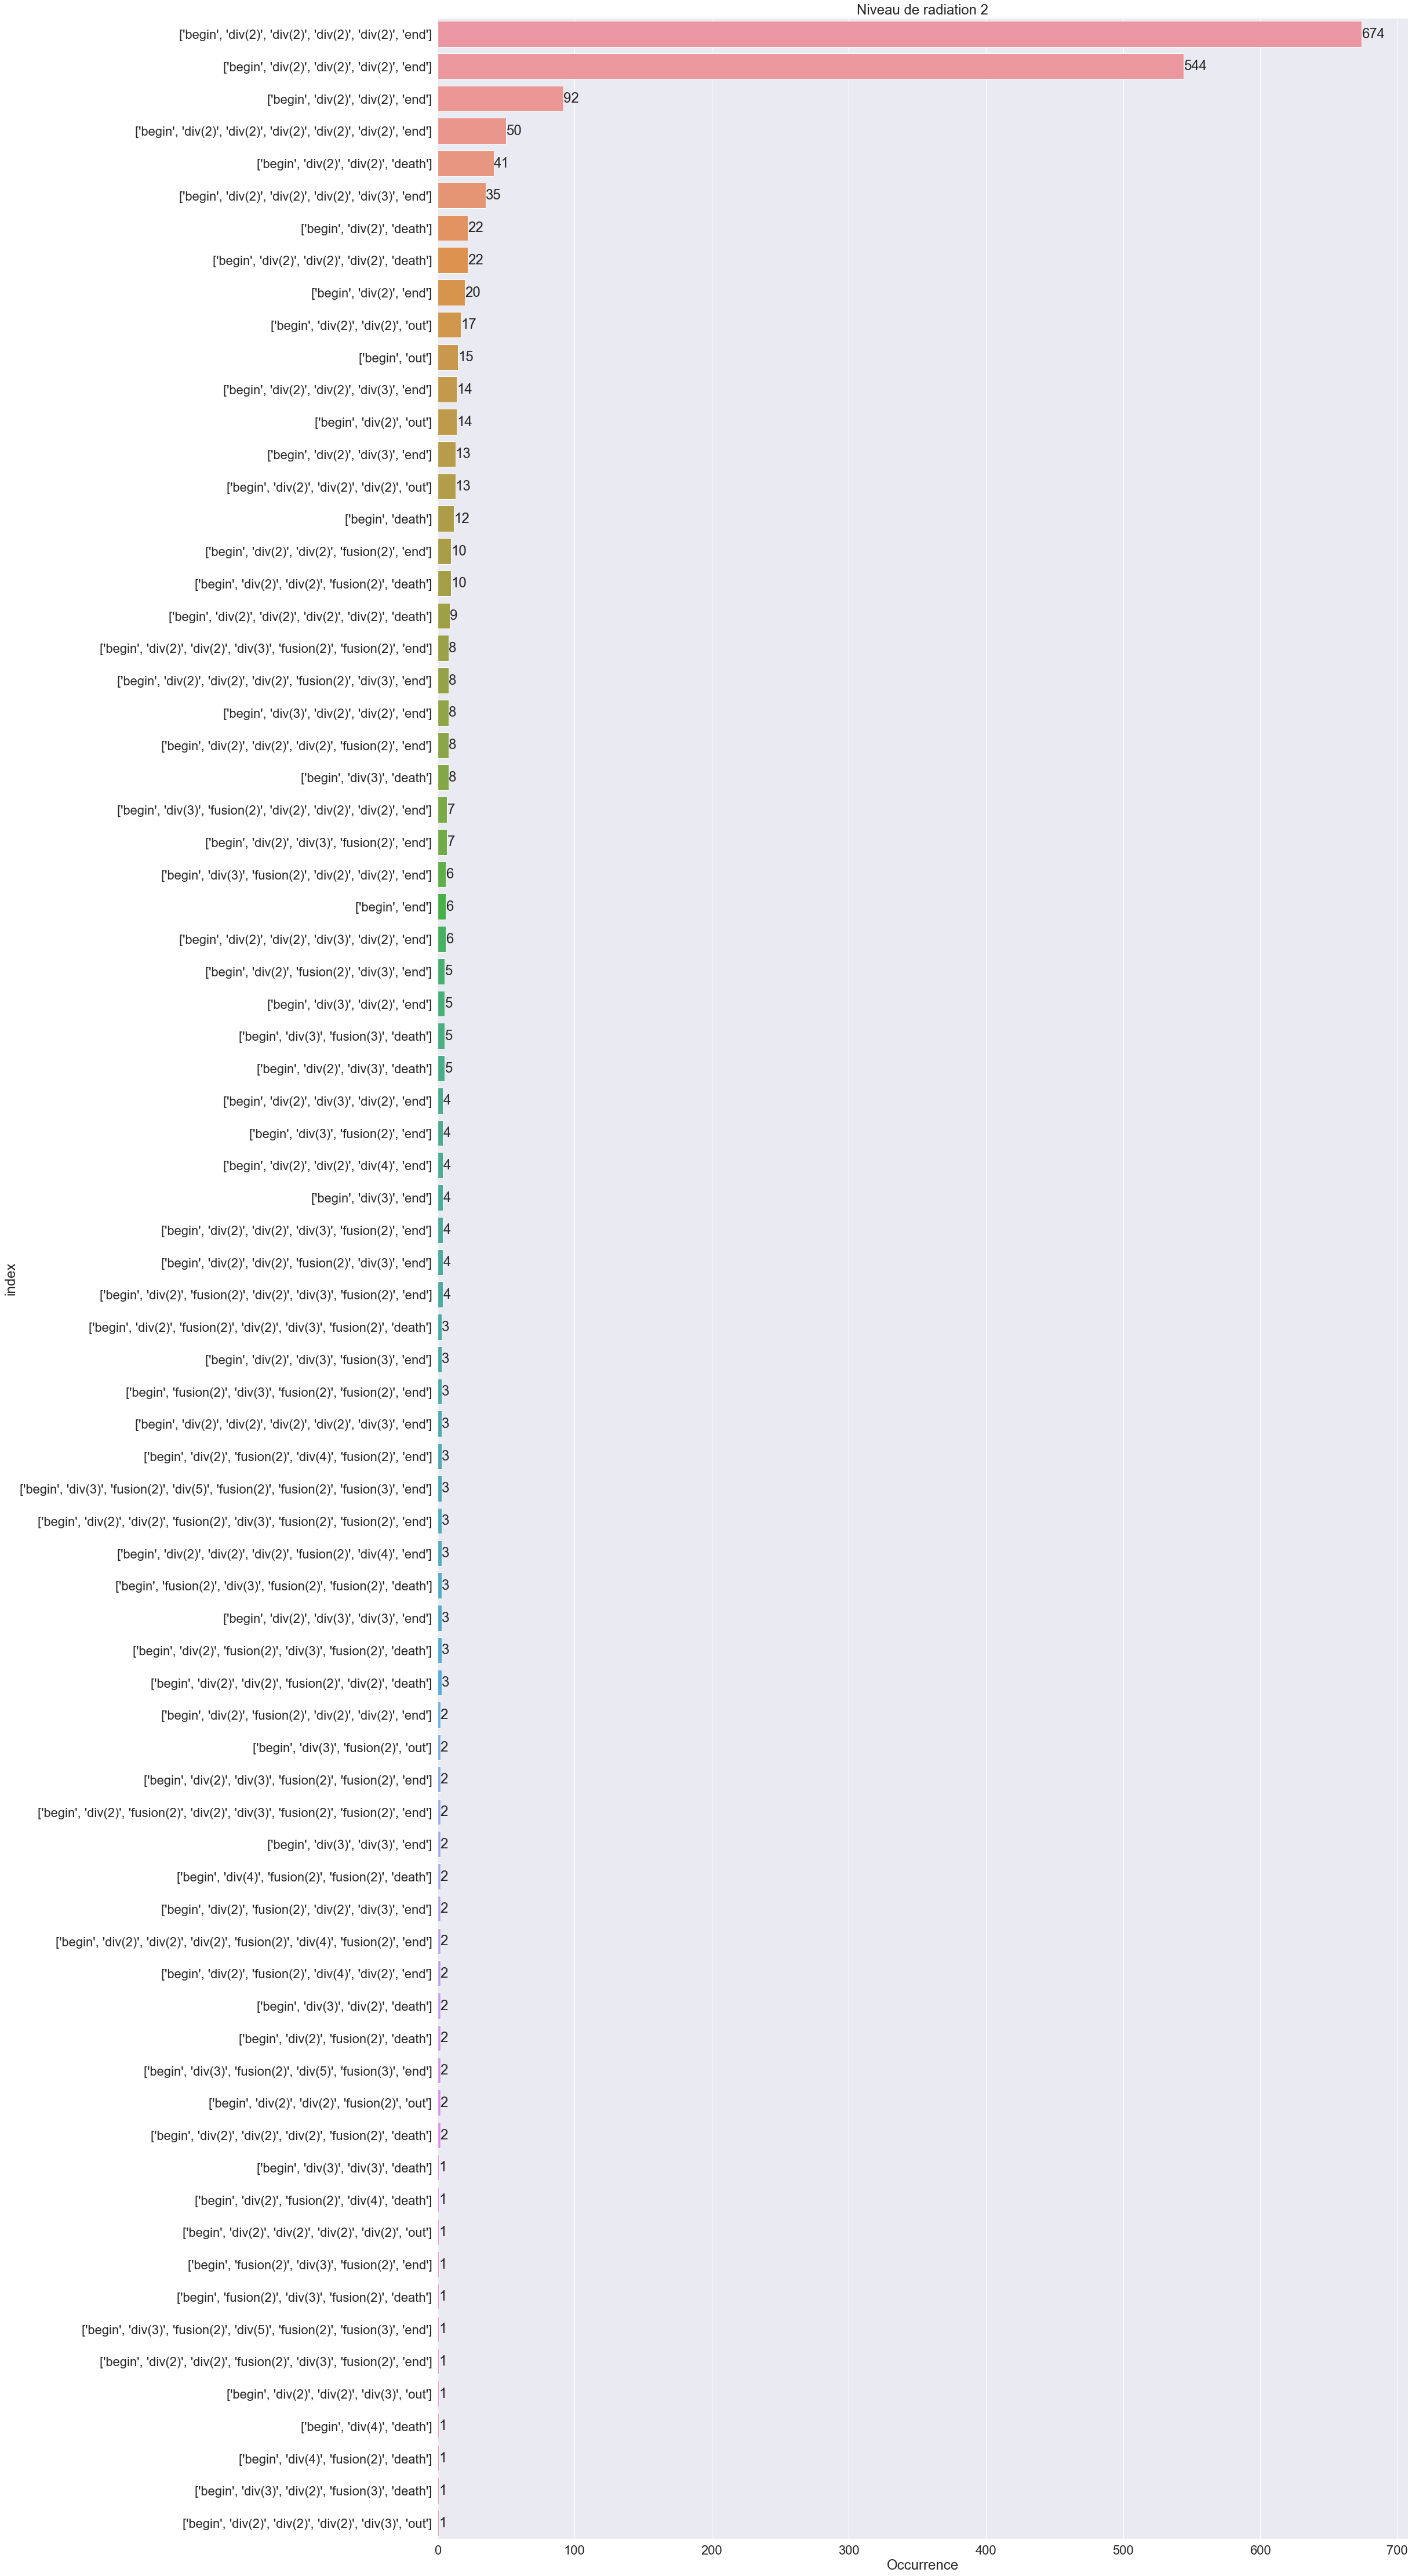

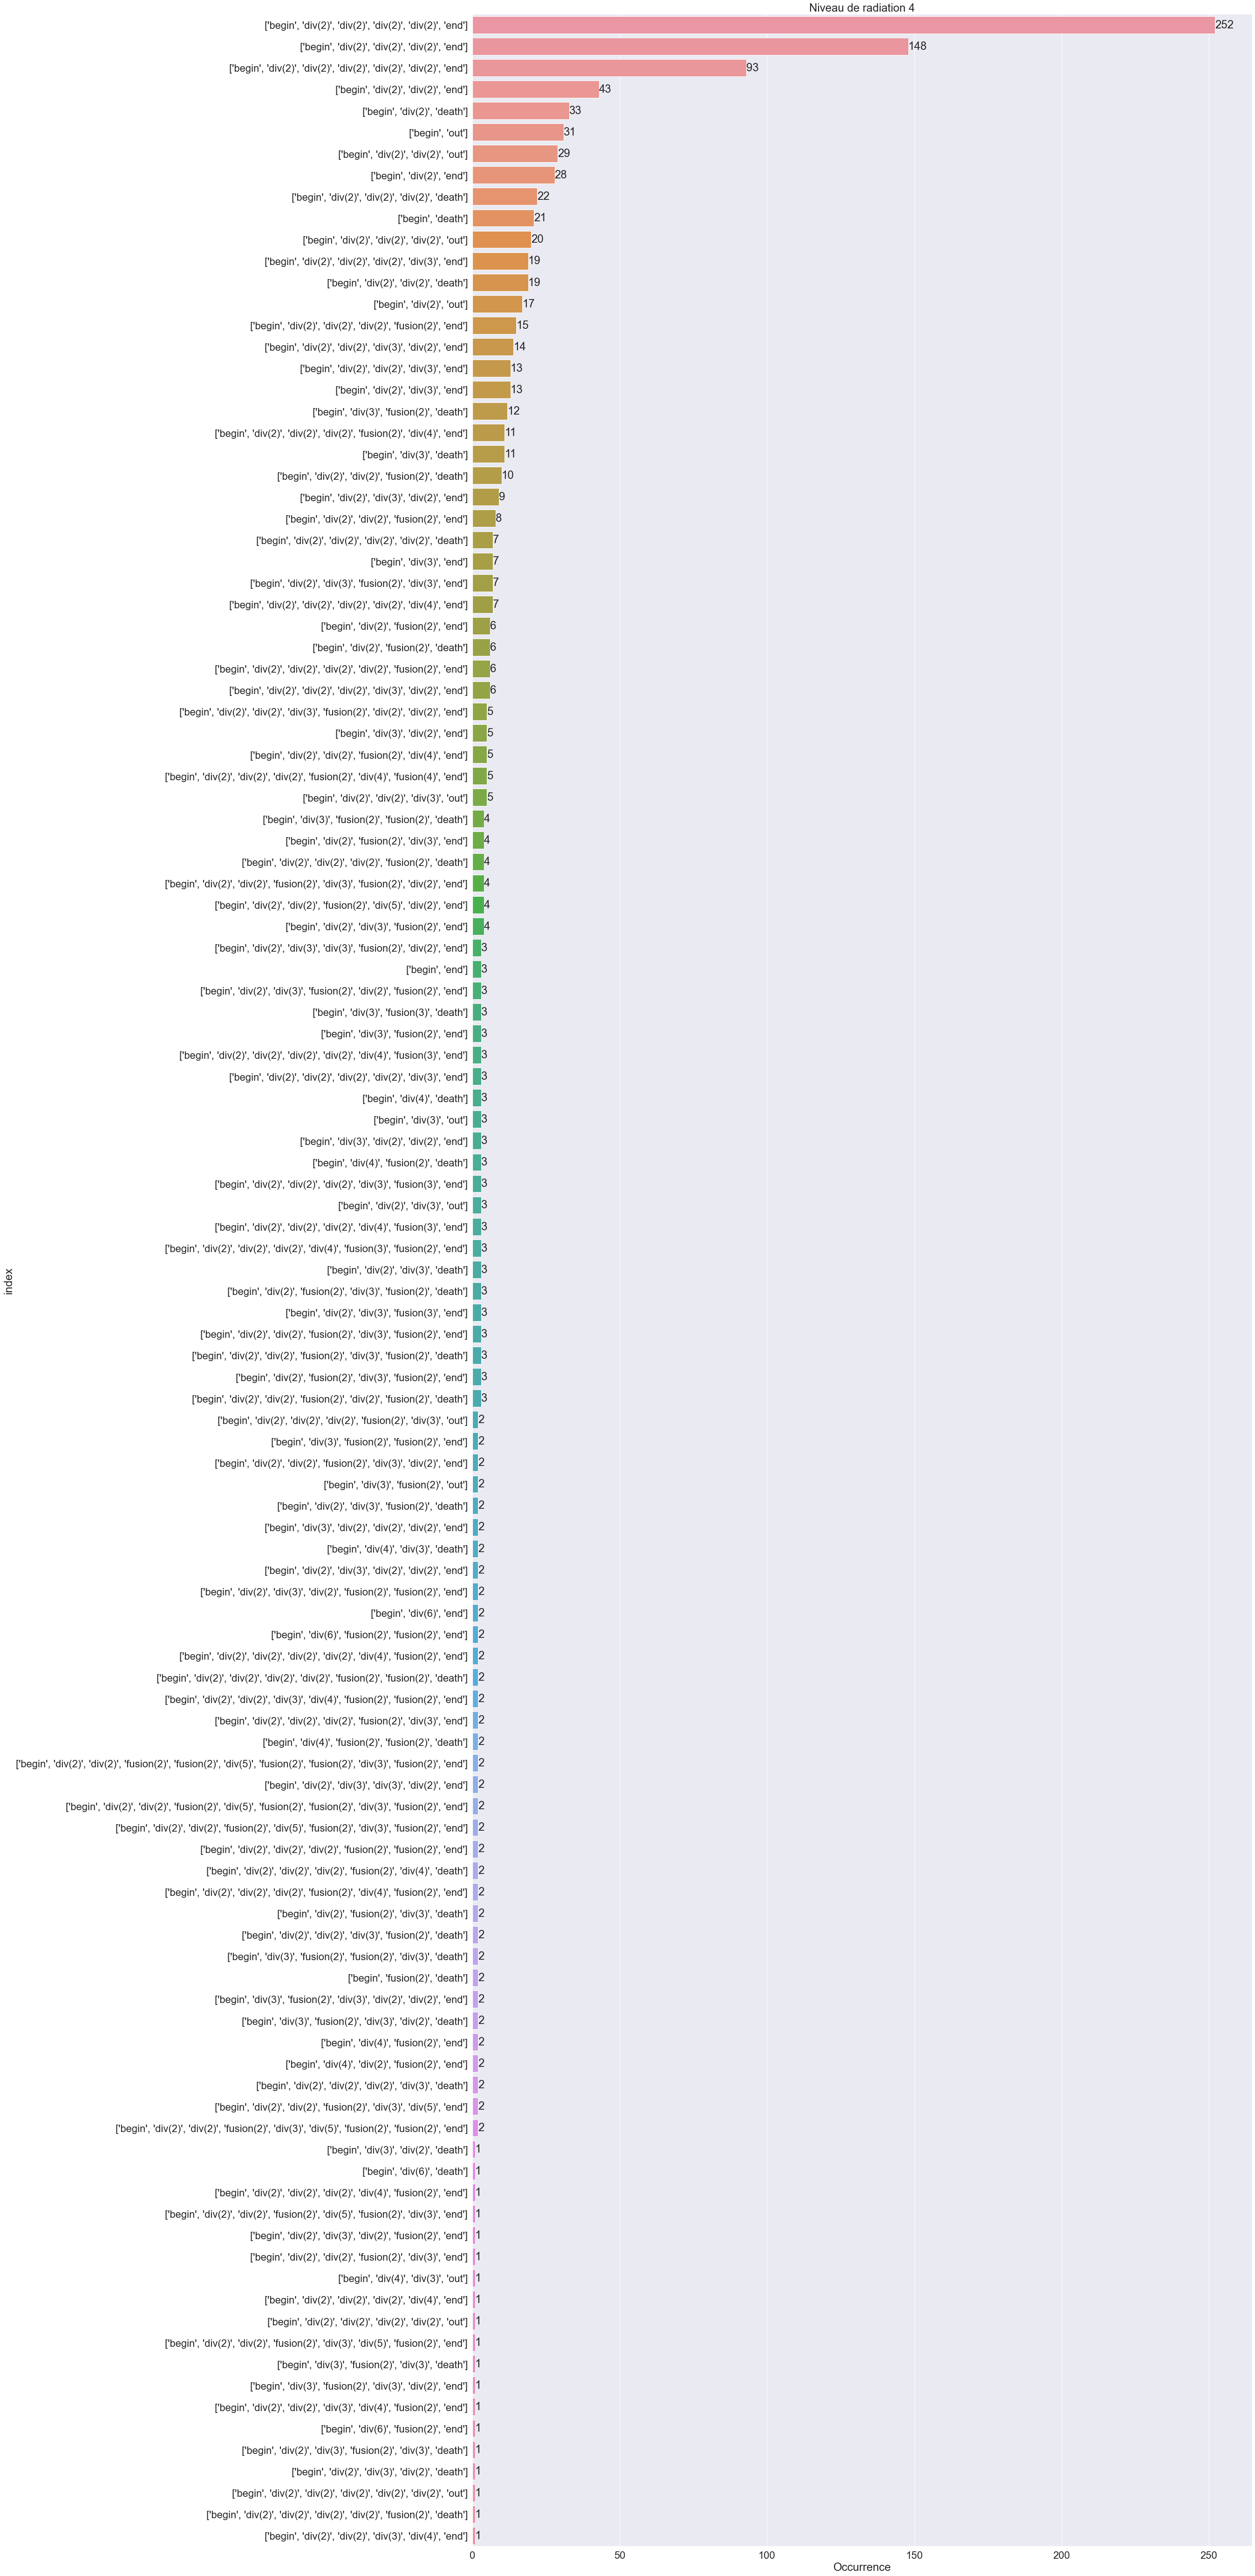

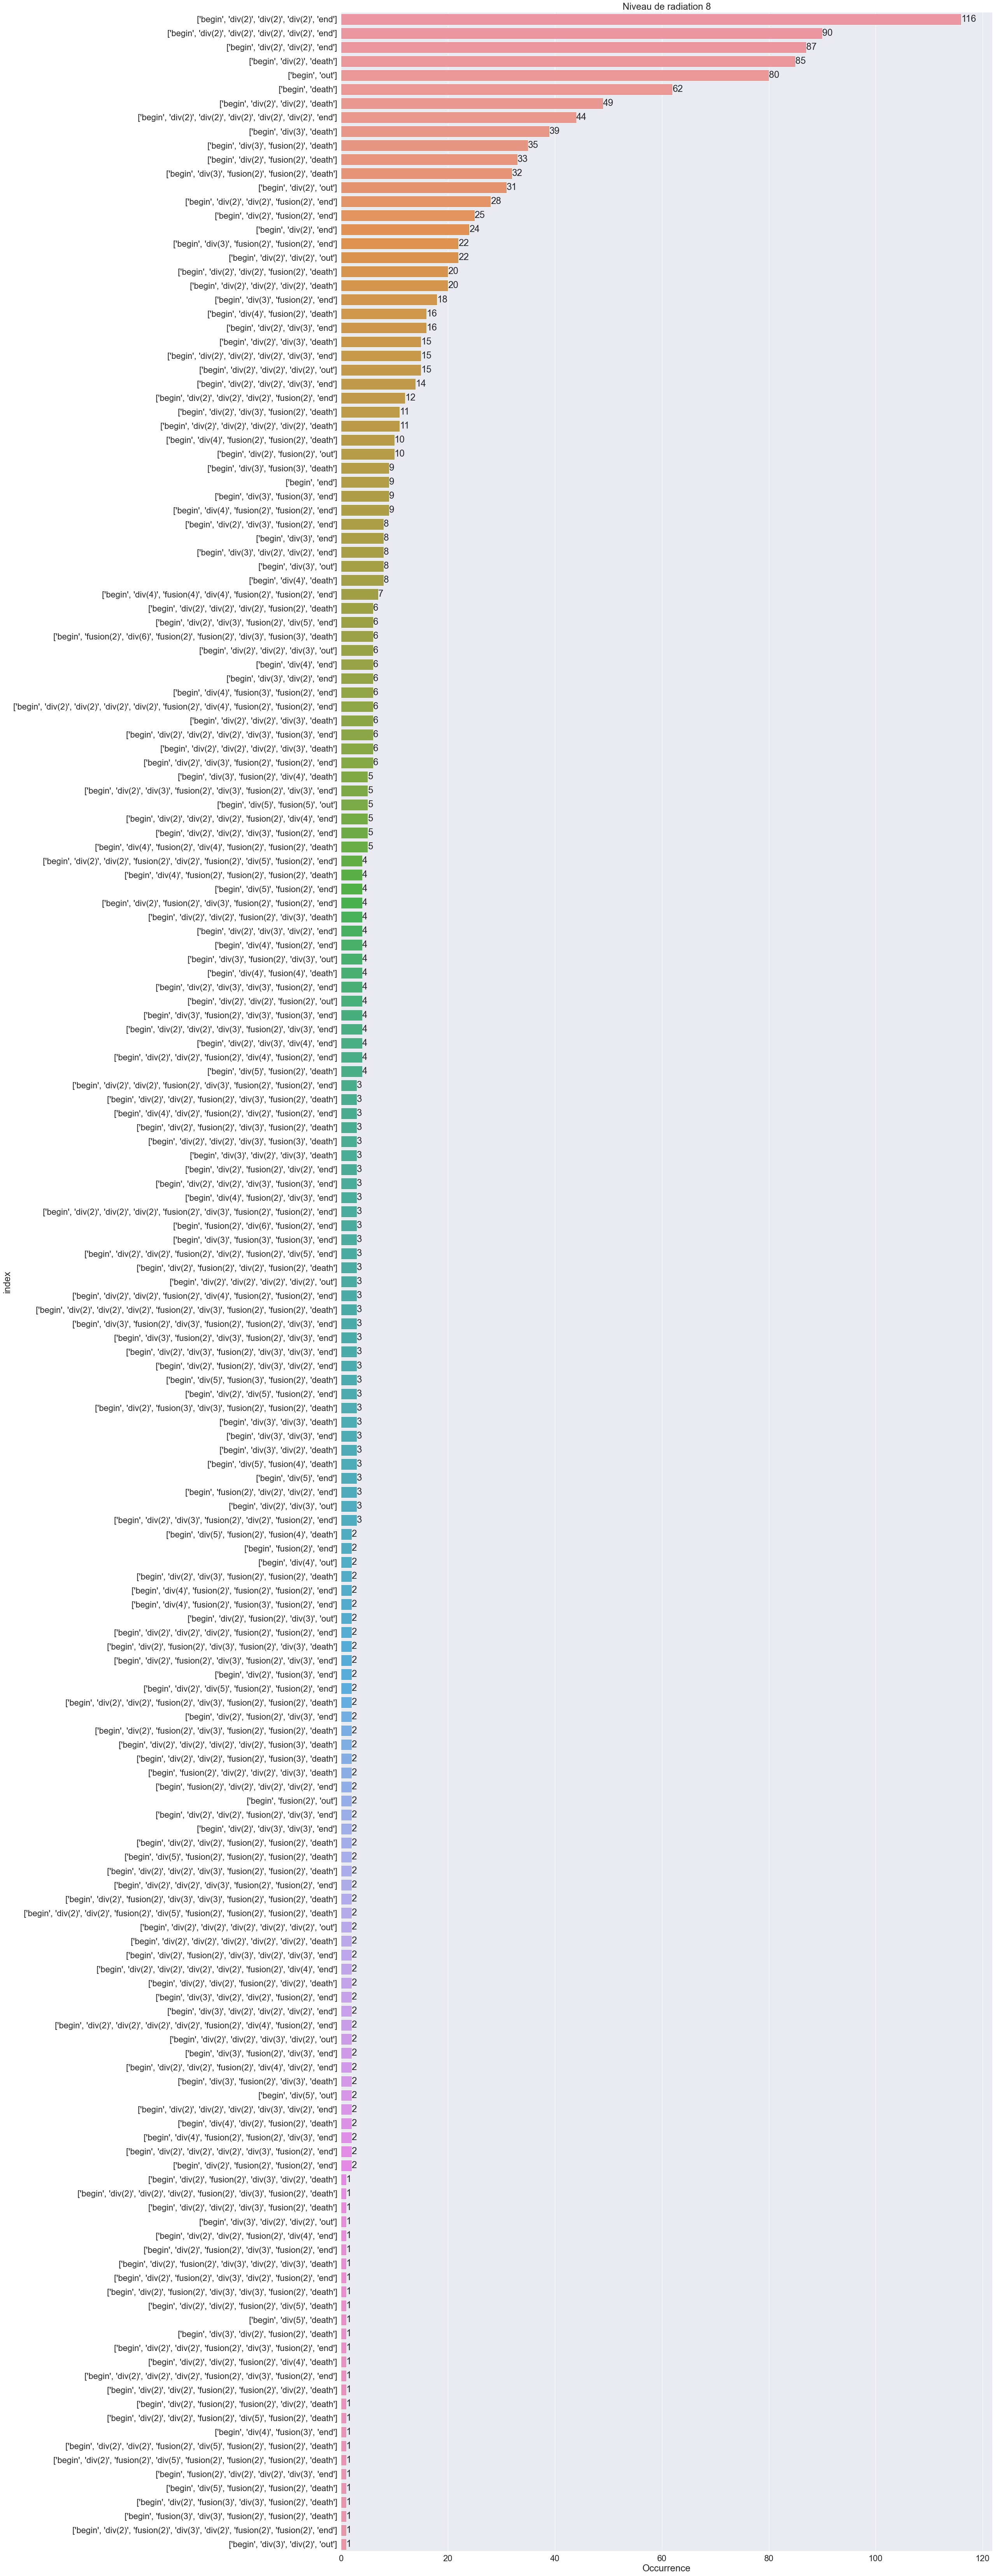

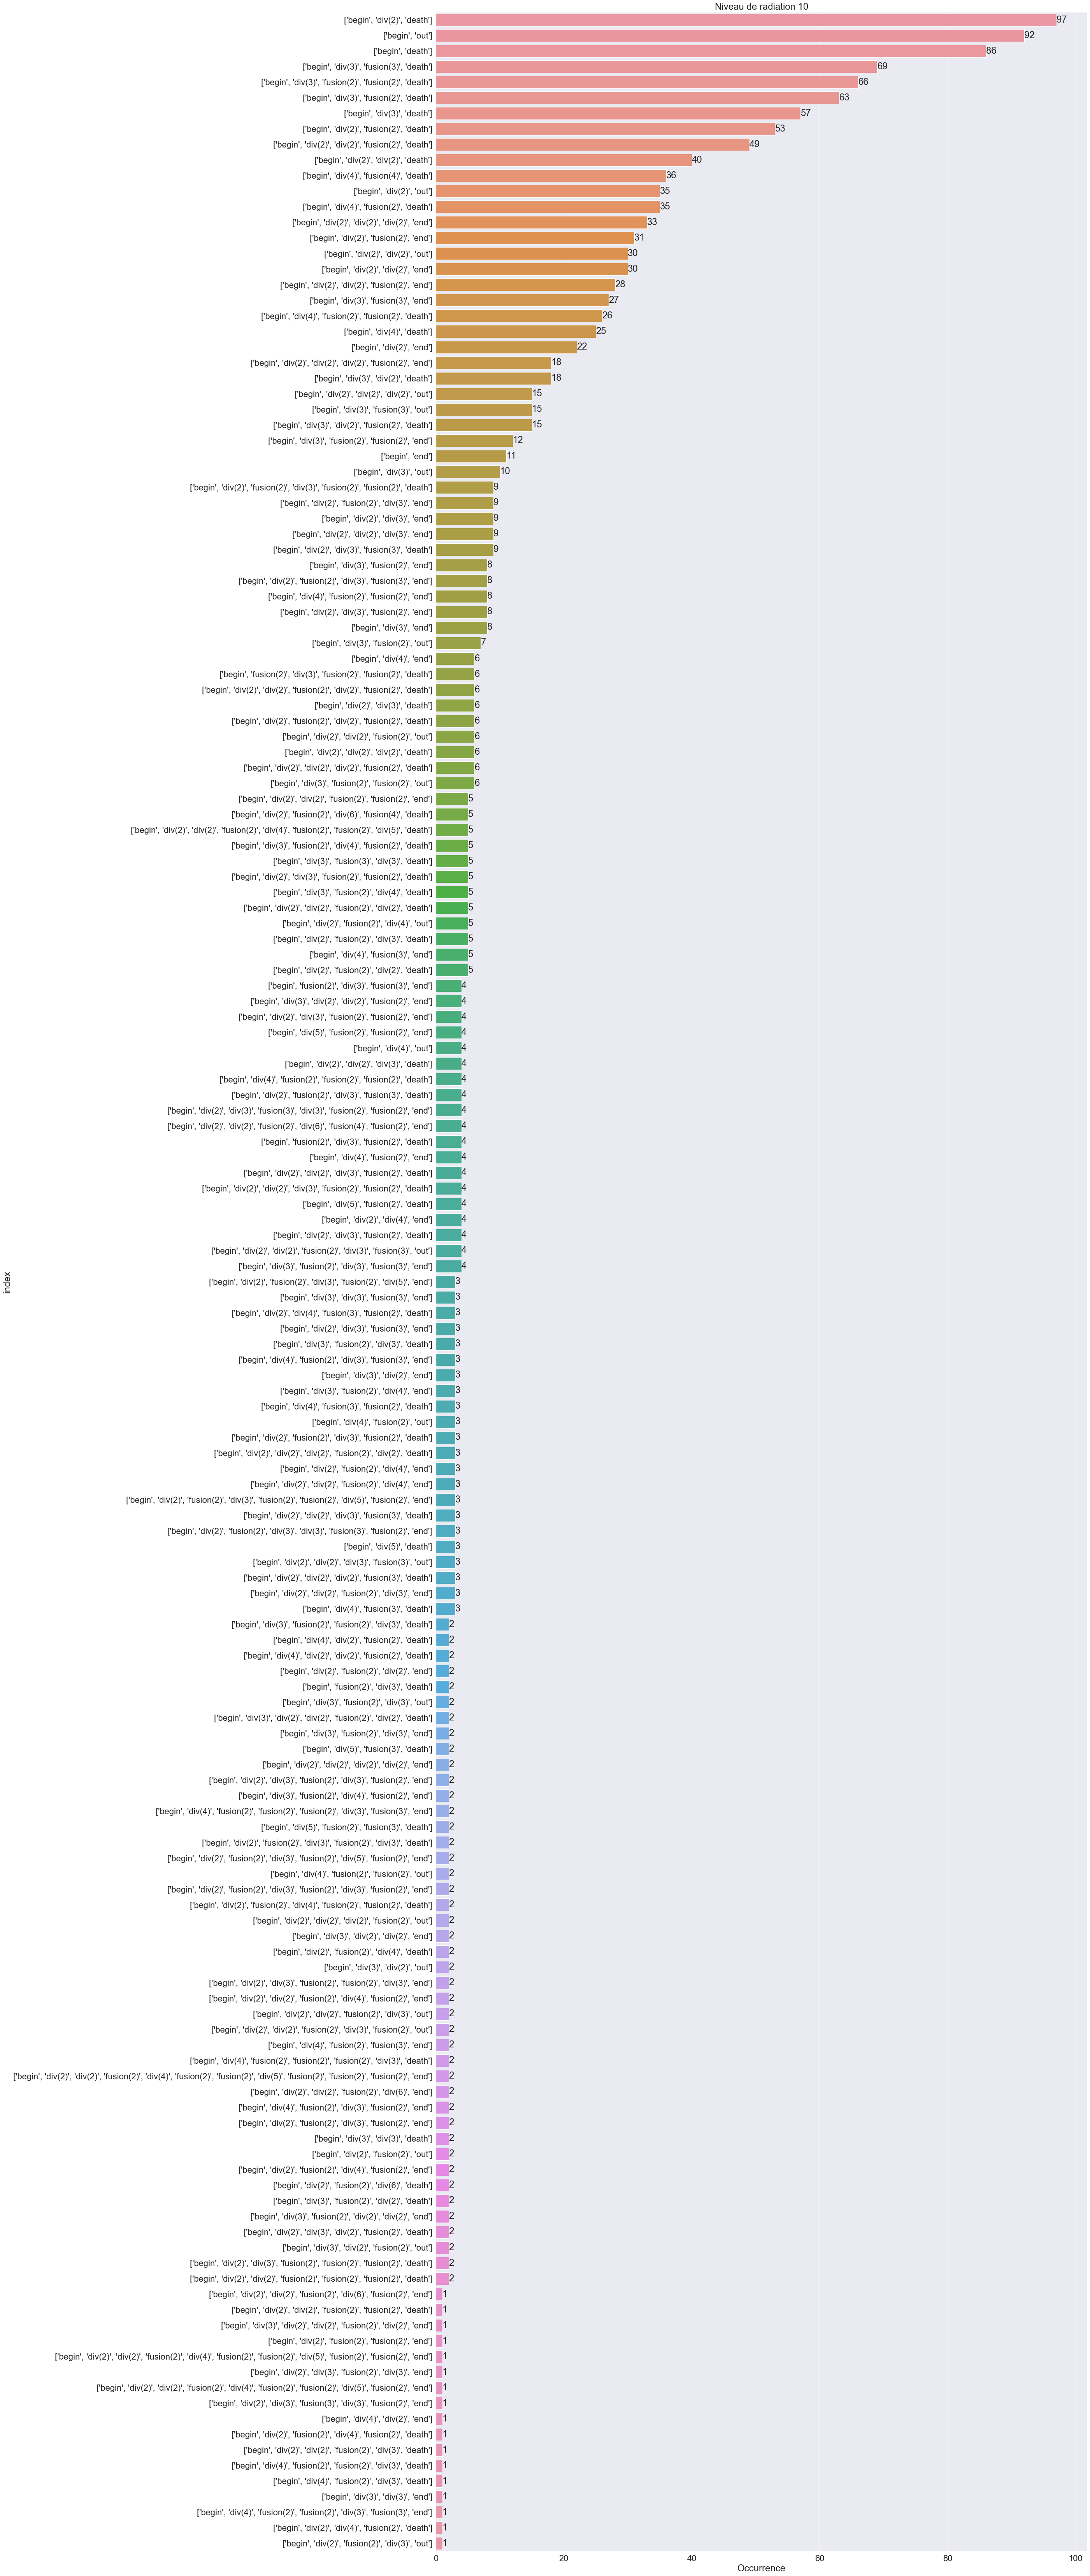

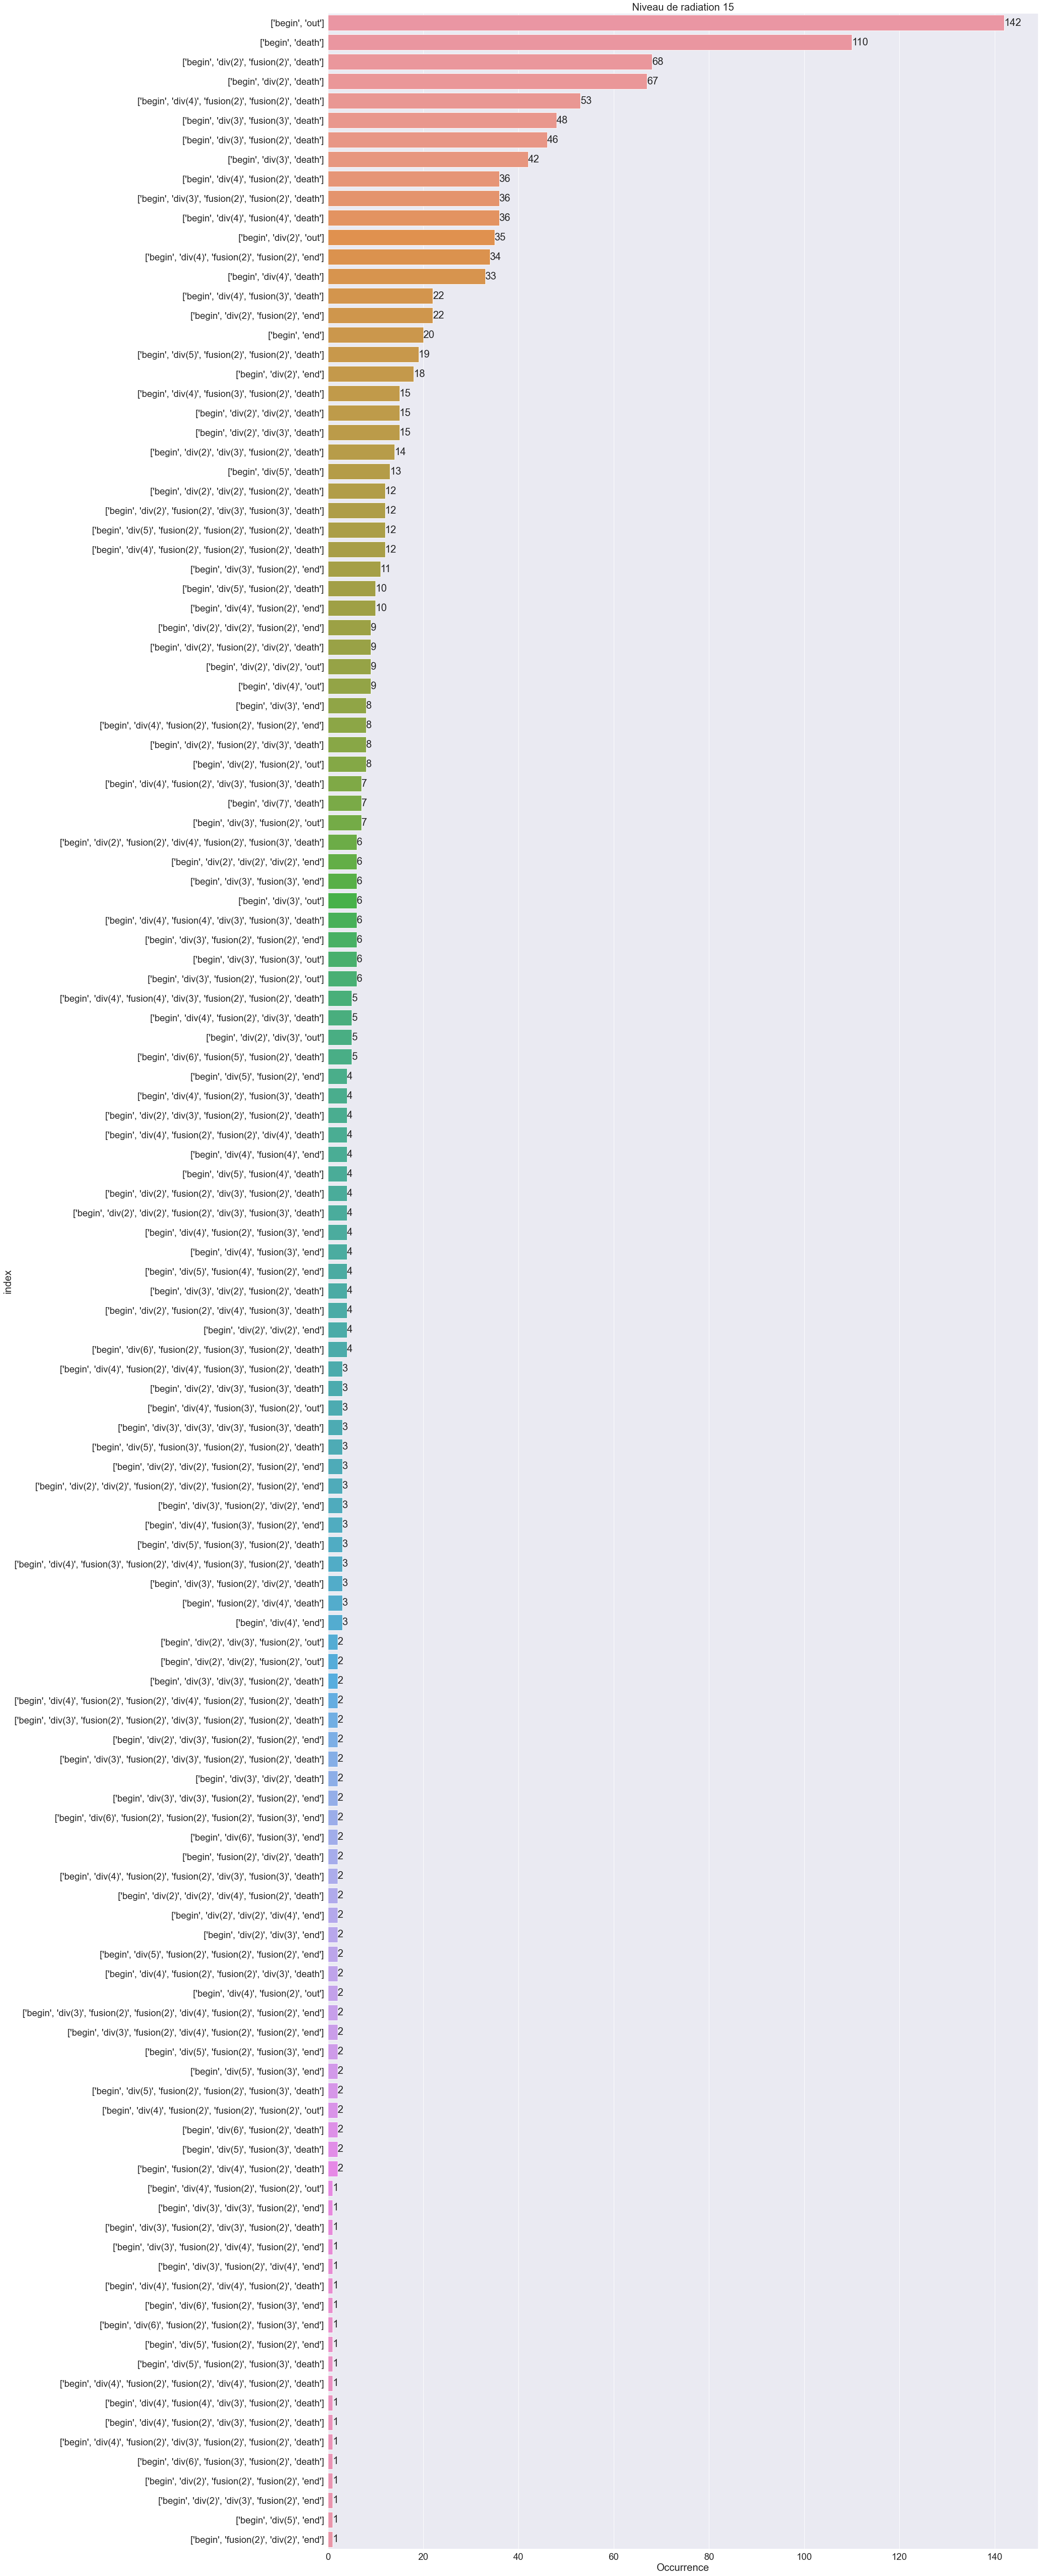

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn
import os
import time

time1 = time.time()

DATA_FOLDER = './epicea/glioblastoma_data/extracted_data/cell_behaviors/videos_transcriptions_csv'

"""
EXTRACTION DES DONNEES
"""
raw_data = dict()
for dirname, _, filenames in os.walk(DATA_FOLDER):
    for filename in filenames:
        filename_split = filename.split("_")
        experiment_type = filename_split[0]
        experiment_setting = experiment_type+"," + \
            filename_split[1][1:-1].replace(" ", "")
        radiation_level = int(filename_split[2].split("gy")[0])
        experiment_id = filename_split[-1][:-4]
        if radiation_level not in raw_data:
            raw_data[radiation_level] = dict()
        if experiment_setting not in raw_data[radiation_level]:
            raw_data[radiation_level][experiment_setting] = dict()
        df = pd.read_csv(str(os.path.join(dirname, filename)),
                         converters={"input": lambda x: x.strip("[]").replace(' ', "").replace("'", "").replace('"', "").replace(',', " ").split(),
                                     "output": lambda x: x.strip("[]").replace(' ', "").replace("'", "").replace('"', "").replace(',', " ").split()})
        raw_data[radiation_level][experiment_setting][experiment_id] = df


"""
FONCTION D'ANALYSE D'UNE DATAFRAME
"""
def chemins_V1(dataframe):
    chemins = []
    for row in dataframe.iterrows():

        input = row[1]['input']
        output = row[1]['output']
        event = row[1]['event']

        if event == 'begin':
            cellule = output[0]
            chemins.append([cellule, 'begin'])

        elif  event == 'div':
            cellule_mere = input[0]

            for i in chemins:
                if i[0] == cellule_mere:
                    i.append('div(' + str(len(output)) + ')')
                    chemin_a_dupliquer = i.copy()
                    i[0] = output[0]

            for nom_cellule in output[1:]:
                nouveau_chemin = chemin_a_dupliquer.copy()
                nouveau_chemin[0] = nom_cellule
                chemins.append(nouveau_chemin)


        elif event == 'fusion':
            for cellule in input:
                for i in chemins:
                    if i[0] == cellule:
                        i.append('fusion(' + str(len(input)) + ')')
                        i[0] = output[0]

                
        elif event == 'death':
            for i in chemins:
                if i[0] == input[0]:
                    i.append('death')


        elif event == 'out':
            for i in chemins:
                if i[0] == input[0]:
                    i.append('out')

        elif event == 'end':
            for i in chemins:
                if i[0] == input[0]:
                    i.append('end')
    
    for i in chemins:
        i.pop(0)
    
    return chemins

"""
APPLICATION DE LA FONCTION A TOUTES LES DATAFRAMES
"""
chemins_global = pd.DataFrame()
for radiation_level in raw_data:
    for experiment_setting in raw_data[radiation_level]:
        for experiment_id in raw_data[radiation_level][experiment_setting]:
            df = raw_data[radiation_level][experiment_setting][experiment_id]
            chemins = chemins_V1(df)
            l = len(chemins)
            a = [radiation_level for i in range(l)]
            b = [experiment_setting for i in range(l)]
            c = [experiment_id for i in range(l)]
            d = list(zip(a,b,c,chemins))
            e = pd.DataFrame(d, columns = ['Radiation level', 'Experiment setting', 'Experiment ID', 'Chemin'])
            chemins_global = pd.concat([chemins_global, e], ignore_index=True)

#chemins_global.to_csv('chemins_global')

time2 = time.time() - time1
print(time2)

#data = pd.read_csv('./chemins_global')
#data=data.drop('Unnamed: 0', axis=1)

chemins_global["Chemin"] = chemins_global["Chemin"].astype(str)

"""
DONNEES REPARTIES PAR NIVEAU DE RADIATION
"""
rad_0_normal = chemins_global.loc[(chemins_global['Experiment setting'].str.contains('normal') == True) & (chemins_global['Radiation level'] == 0)]
rad_2_normal = chemins_global.loc[(chemins_global['Experiment setting'].str.contains('normal') == True) & (chemins_global['Radiation level'] == 2)]
rad_4_normal = chemins_global.loc[(chemins_global['Experiment setting'].str.contains('normal') == True) & (chemins_global['Radiation level'] == 4)]
rad_8_normal = chemins_global.loc[(chemins_global['Experiment setting'].str.contains('normal') == True) & (chemins_global['Radiation level'] == 8)]
rad_10_normal = chemins_global.loc[(chemins_global['Experiment setting'].str.contains('normal') == True) & (chemins_global['Radiation level'] == 10)]
rad_15_normal = chemins_global.loc[(chemins_global['Experiment setting'].str.contains('normal') == True) & (chemins_global['Radiation level'] == 15)]


"""
AFFICHAGE GRAPHIQUE DU NOMBRE OCCURRENCE DE CHAQUE CHEMIN EN FONCTION DU NIVEAU DE RADIATION
"""
seaborn.set(font_scale = 2)

# Niveau 0
rad_0_count = rad_0_normal.Chemin.value_counts().reset_index(name='Occurrence')
plt.figure(figsize=(30,20))
ax = seaborn.barplot(data = rad_0_count, x = 'Occurrence', y = 'index')
ax.set(title = 'Niveau de radiation 0')
ax.bar_label(ax.containers[0])

#Niveau 2
rad_2_count = rad_2_normal.Chemin.value_counts().reset_index(name='Occurrence')
plt.figure(figsize=(30,80))
ax = seaborn.barplot(data = rad_2_count, x = 'Occurrence', y = 'index')
ax.set(title = 'Niveau de radiation 2')
ax.bar_label(ax.containers[0])

#Niveau 4
rad_4_count = rad_4_normal.Chemin.value_counts().reset_index(name='Occurrence')
plt.figure(figsize=(30,100))
ax = seaborn.barplot(data = rad_4_count, x = 'Occurrence', y = 'index')
ax.set(title = 'Niveau de radiation 4')
ax.bar_label(ax.containers[0])

#Niveau 8
rad_8_count = rad_8_normal.Chemin.value_counts().reset_index(name='Occurrence')
plt.figure(figsize=(30,120))
ax = seaborn.barplot(data = rad_8_count, x = 'Occurrence', y = 'index')
ax.set(title = 'Niveau de radiation 8')
ax.bar_label(ax.containers[0])

#Niveau 10
rad_10_count = rad_10_normal.Chemin.value_counts().reset_index(name='Occurrence')
plt.figure(figsize=(30,120))
ax = seaborn.barplot(data = rad_10_count, x = 'Occurrence', y = 'index')
ax.set(title = 'Niveau de radiation 10')
ax.bar_label(ax.containers[0])

#Niveau 15
rad_15_count = rad_15_normal.Chemin.value_counts().reset_index(name='Occurrence')
plt.figure(figsize=(30,110))
ax = seaborn.barplot(data = rad_15_count, x = 'Occurrence', y = 'index')
ax.set(title = 'Niveau de radiation 15')
ax.bar_label(ax.containers[0])

plt.show()